# Interaction of Plane Asymptotic Gravitational Waves by Hayward
#####  Geoff Cope
#####  University of Utah
#####  December 25, 2021  Christmas Day AND the launch of JWST!

I think the problem in evaluating metrics of this form is with the hyperbolic trig functions.  See traceback:
695     if expr.has(TrigonometricFunction, HyperbolicFunction):

In [1]:
from sympy import init_session
init_session(use_latex=True)

IPython console for SymPy 1.9 (Python 3.8.8-64-bit) (ground types: gmpy)

These commands were executed:
>>> from __future__ import division
>>> from sympy import *
>>> x, y, z, t = symbols('x y z t')
>>> k, m, n = symbols('k m n', integer=True)
>>> f, g, h = symbols('f g h', cls=Function)
>>> init_printing()

Documentation can be found at https://docs.sympy.org/1.9/



In [2]:
import warnings
import matplotlib.cbook
warnings.filterwarnings("ignore",category=matplotlib.cbook.mplDeprecation)

In [44]:
u,v,x,y,du,dv,dx,dy = symbols( 'u v x y du dv dx dy' , positive = True, real = True  ) 

In [45]:
P = Function('P')(u,v)
P

In [46]:
M = Function('M')(u,v)
M

In [47]:
Q = Function('Q')(u,v)
Q

In [48]:
W = Function('W')(u,v)
W

In [49]:
variables = Matrix( [u,v,x,y] )
variables

⎡u⎤
⎢ ⎥
⎢v⎥
⎢ ⎥
⎢x⎥
⎢ ⎥
⎣y⎦

In [50]:
differentials = Matrix( [du,dv,dx,dy])
differentials 

⎡du⎤
⎢  ⎥
⎢dv⎥
⎢  ⎥
⎢dx⎥
⎢  ⎥
⎣dy⎦

In [51]:
lineElement = expand(2*exp(-M)*du*dv - exp(-P)* (dx**2 * exp(Q) * cosh(W) - 2 *dx*dy*sinh(W) + dy**2 * exp(-Q)*cosh(W)))
lineElement 

In [52]:
g = zeros(4)

for i in range(4):
    for j in range(4):
        if i == j:
            g[i,j] = lineElement.coeff( differentials[i],2 ) 
        else:
            g[i,j] = Rational(1,2)*lineElement.coeff( differentials[i]*differentials[j],1 )
            
g

⎡            -M(u, v)                                                                       
⎢    0      ℯ                          0                                  0                 
⎢                                                                                           
⎢ -M(u, v)                                                                                  
⎢ℯ              0                      0                                  0                 
⎢                                                                                           
⎢                        -P(u, v)  Q(u, v)                      -P(u, v)                    
⎢    0          0      -ℯ        ⋅ℯ       ⋅cosh(W(u, v))       ℯ        ⋅sinh(W(u, v))      
⎢                                                                                           
⎢                            -P(u, v)                       -P(u, v)  -Q(u, v)              
⎣    0          0           ℯ        ⋅sinh(W(u, v))       -ℯ        ⋅ℯ

In [53]:
import sympy

In [54]:
m = sympy.Array(g)
m

⎡            -M(u, v)                                                                       
⎢    0      ℯ                          0                                  0                 
⎢                                                                                           
⎢ -M(u, v)                                                                                  
⎢ℯ              0                      0                                  0                 
⎢                                                                                           
⎢                        -P(u, v)  Q(u, v)                      -P(u, v)                    
⎢    0          0      -ℯ        ⋅ℯ       ⋅cosh(W(u, v))       ℯ        ⋅sinh(W(u, v))      
⎢                                                                                           
⎢                            -P(u, v)                       -P(u, v)  -Q(u, v)              
⎣    0          0           ℯ        ⋅sinh(W(u, v))       -ℯ        ⋅ℯ

In [18]:
from einsteinpy.symbolic import *

In [55]:
syms = sympy.symbols("u v x y"  , positive = True, real = True)
u,v,x,y = syms

In [56]:
metric = MetricTensor(m,syms)

In [57]:
ch = ChristoffelSymbols.from_metric(metric)
simplify(ch.tensor())

⎡                                                                                           
⎢                                                                                           
⎢                                                                                           
⎢                                                                                           
⎢                                                                                           
⎢                                                                                           
⎢⎡ ∂                                                                                        
⎢⎢-──(M(u, v))  0                                                         0                 
⎢⎢ ∂u                                                                                       
⎢⎢                                                                                          
⎢⎢     0        0                                                     

In [ ]:
Ric = RicciTensor.from_metric(metric)
Ric.tensor()

In [ ]:
R = RicciScalar.from_riccitensor(Ric)
R.simplify()
R.expr

In [ ]:
einst = EinsteinTensor.from_metric(metric)
einst.tensor()

In [ ]:
#  rm1 = RiemannCurvatureTensor.from_christoffels(ch)
#  rm1.tensor()

In [ ]:
#  weyl = WeylTensor.from_metric(metric)
#  weyl.tensor()

In [13]:
expand(lineElement.rewrite(exp))

In [23]:
ricciSimplified = simplify(Ric.tensor())
ricciSimplified

⎡                                             2                                          2  
⎢                      2⋅W(u, v) ⎛∂          ⎞                              ⎛∂          ⎞   
⎢                     ℯ         ⋅⎜──(Q(u, v))⎟                              ⎜──(P(u, v))⎟   
⎢                                ⎝∂u         ⎠    ∂           ∂             ⎝∂u         ⎠   
⎢                   - ───────────────────────── + ──(M(u, v))⋅──(P(u, v)) - ────────────── +
⎢                                 8               ∂u          ∂u                  2         
⎢                                                                                           
⎢                                                                                           
⎢                                                                                           
⎢   2⋅W(u, v) ∂           ∂             ∂           ∂             ∂           ∂             
⎢  ℯ         ⋅──(Q(u, v))⋅──(Q(u, v))   ──(P(u, v))⋅──(P(u, v))   ──(Q

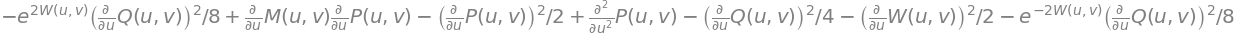

In [26]:
ricciSimplified[0,0]

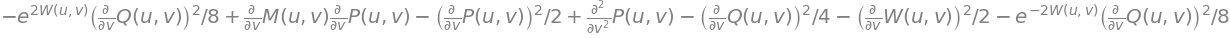

In [27]:
ricciSimplified[1,1]

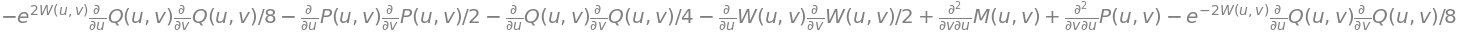

In [28]:
ricciSimplified[0,1]

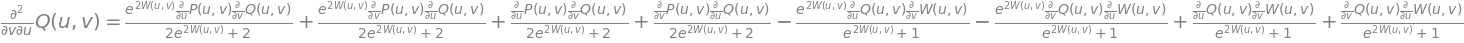

In [42]:
Eq(diff(Q,u,v),expand(solve( ricciSimplified[2,2].args[1]-ricciSimplified[3,3].args[1] , diff(Q,u,v) )[0]) ) 

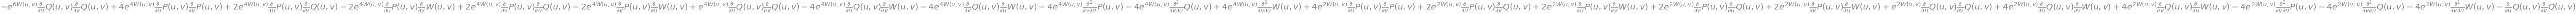

In [36]:
ricciSimplified[3,3].args[1]

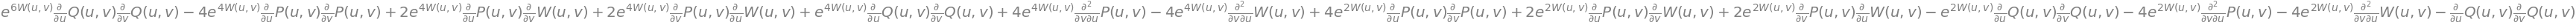

In [38]:
ricciSimplified[2,3].args[1]